In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from tensorflow.keras.preprocessing import image

In [2]:
movie_data=pd.read_csv('C:\\Users\KIIT\Desktop\\bank\\new\\movie_poster_analysis\\Multi_Label_dataset\\train.csv')

In [3]:
movie_data.head(5)

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
path='Image/'

In [5]:
#path='path' +movie_data[1][0]+'.jpg'

In [6]:
image_width=128
image_heaight=128
x=[]
for i in tqdm(range(movie_data.shape[0])):
    path='Images/'+movie_data['Id'][i]+'.jpg'
    img=image.load_img(path,target_size=(image_width,
       image_heaight,3))
    img=image.img_to_array(img)
    img=img/255.0
    x.append(img)
x=np.array(x)

100%|██████████| 7254/7254 [00:39<00:00, 183.06it/s]


In [7]:
x.shape

(7254, 128, 128, 3)

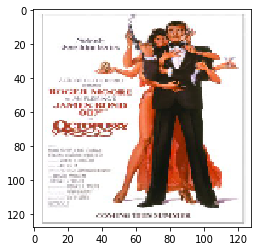

In [8]:
plt.imshow(x[4])

In [9]:
y=movie_data.drop(['Id','Genre'],axis=1)

In [10]:
y=y.to_numpy()

In [11]:
y.shape

(7254, 25)

In [12]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,BatchNormalization,MaxPool2D,Dropout
from tensorflow.keras.optimizers import Adam

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.15)

In [15]:
x_train[0].shape

(128, 128, 3)

In [16]:
model=Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=x_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))


model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())


model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(25,activation='sigmoid'))




In [19]:
model.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
model1=model.fit(x_train,y_train,epochs=5,batch_size=64,validation_data=(x_test,y_test))

Train on 6165 samples, validate on 1089 samples
Epoch 1/5
6165/6165 [==============================] - ETA: 35:43 - loss: 1.0066 - accuracy: 0.496 - ETA: 22:46 - loss: 1.0084 - accuracy: 0.500 - ETA: 17:44 - loss: 0.9969 - accuracy: 0.512 - ETA: 14:27 - loss: 0.9920 - accuracy: 0.513 - ETA: 12:32 - loss: 0.9904 - accuracy: 0.511 - ETA: 11:08 - loss: 0.9853 - accuracy: 0.511 - ETA: 10:02 - loss: 0.9785 - accuracy: 0.514 - ETA: 9:13 - loss: 0.9742 - accuracy: 0.516 - ETA: 8:38 - loss: 0.9706 - accuracy: 0.51 - ETA: 8:04 - loss: 0.9698 - accuracy: 0.51 - ETA: 7:36 - loss: 0.9652 - accuracy: 0.51 - ETA: 7:12 - loss: 0.9632 - accuracy: 0.51 - ETA: 6:52 - loss: 0.9623 - accuracy: 0.51 - ETA: 6:36 - loss: 0.9595 - accuracy: 0.51 - ETA: 6:34 - loss: 0.9543 - accuracy: 0.52 - ETA: 6:25 - loss: 0.9502 - accuracy: 0.52 - ETA: 6:14 - loss: 0.9478 - accuracy: 0.52 - ETA: 6:02 - loss: 0.9467 - accuracy: 0.52 - ETA: 5:50 - loss: 0.9439 - accuracy: 0.52 - ETA: 5:40 - loss: 0.9410 - accuracy: 0.52 - ET

6165/6165 [==============================] - ETA: 5:17 - loss: 0.6432 - accuracy: 0.68 - ETA: 5:32 - loss: 0.6605 - accuracy: 0.67 - ETA: 5:24 - loss: 0.6580 - accuracy: 0.66 - ETA: 4:59 - loss: 0.6495 - accuracy: 0.67 - ETA: 4:44 - loss: 0.6471 - accuracy: 0.67 - ETA: 4:36 - loss: 0.6425 - accuracy: 0.67 - ETA: 4:28 - loss: 0.6399 - accuracy: 0.67 - ETA: 4:21 - loss: 0.6409 - accuracy: 0.67 - ETA: 4:16 - loss: 0.6405 - accuracy: 0.68 - ETA: 4:22 - loss: 0.6396 - accuracy: 0.68 - ETA: 4:24 - loss: 0.6378 - accuracy: 0.68 - ETA: 4:23 - loss: 0.6354 - accuracy: 0.68 - ETA: 4:20 - loss: 0.6324 - accuracy: 0.68 - ETA: 4:20 - loss: 0.6311 - accuracy: 0.68 - ETA: 4:16 - loss: 0.6281 - accuracy: 0.68 - ETA: 4:09 - loss: 0.6259 - accuracy: 0.69 - ETA: 4:07 - loss: 0.6235 - accuracy: 0.69 - ETA: 4:04 - loss: 0.6222 - accuracy: 0.69 - ETA: 4:03 - loss: 0.6197 - accuracy: 0.69 - ETA: 4:02 - loss: 0.6185 - accuracy: 0.69 - ETA: 3:58 - loss: 0.6166 - accuracy: 0.70 - ETA: 3:53 - loss: 0.6141 - accu

6165/6165 [==============================] - ETA: 4:56 - loss: 0.3595 - accuracy: 0.88 - ETA: 5:05 - loss: 0.3654 - accuracy: 0.88 - ETA: 5:04 - loss: 0.3597 - accuracy: 0.88 - ETA: 5:27 - loss: 0.3538 - accuracy: 0.88 - ETA: 5:27 - loss: 0.3546 - accuracy: 0.88 - ETA: 5:17 - loss: 0.3511 - accuracy: 0.88 - ETA: 5:07 - loss: 0.3528 - accuracy: 0.88 - ETA: 5:00 - loss: 0.3505 - accuracy: 0.88 - ETA: 4:51 - loss: 0.3481 - accuracy: 0.88 - ETA: 4:44 - loss: 0.3490 - accuracy: 0.88 - ETA: 4:35 - loss: 0.3467 - accuracy: 0.88 - ETA: 4:28 - loss: 0.3477 - accuracy: 0.88 - ETA: 4:23 - loss: 0.3461 - accuracy: 0.88 - ETA: 4:21 - loss: 0.3424 - accuracy: 0.88 - ETA: 4:15 - loss: 0.3410 - accuracy: 0.88 - ETA: 4:09 - loss: 0.3394 - accuracy: 0.88 - ETA: 4:03 - loss: 0.3397 - accuracy: 0.88 - ETA: 3:57 - loss: 0.3390 - accuracy: 0.88 - ETA: 3:55 - loss: 0.3382 - accuracy: 0.88 - ETA: 3:51 - loss: 0.3378 - accuracy: 0.88 - ETA: 3:46 - loss: 0.3378 - accuracy: 0.88 - ETA: 3:41 - loss: 0.3369 - accu

6165/6165 [==============================] - ETA: 4:13 - loss: 0.2746 - accuracy: 0.90 - ETA: 3:59 - loss: 0.2849 - accuracy: 0.90 - ETA: 3:58 - loss: 0.2799 - accuracy: 0.90 - ETA: 3:55 - loss: 0.2827 - accuracy: 0.90 - ETA: 3:46 - loss: 0.2838 - accuracy: 0.90 - ETA: 3:40 - loss: 0.2825 - accuracy: 0.90 - ETA: 3:41 - loss: 0.2781 - accuracy: 0.90 - ETA: 3:40 - loss: 0.2767 - accuracy: 0.90 - ETA: 3:38 - loss: 0.2756 - accuracy: 0.90 - ETA: 3:36 - loss: 0.2783 - accuracy: 0.90 - ETA: 3:31 - loss: 0.2793 - accuracy: 0.90 - ETA: 3:27 - loss: 0.2780 - accuracy: 0.90 - ETA: 3:23 - loss: 0.2755 - accuracy: 0.90 - ETA: 3:18 - loss: 0.2742 - accuracy: 0.90 - ETA: 3:19 - loss: 0.2744 - accuracy: 0.90 - ETA: 3:19 - loss: 0.2746 - accuracy: 0.90 - ETA: 3:16 - loss: 0.2751 - accuracy: 0.90 - ETA: 3:13 - loss: 0.2751 - accuracy: 0.90 - ETA: 3:10 - loss: 0.2756 - accuracy: 0.90 - ETA: 3:06 - loss: 0.2752 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2747 - accuracy: 0.90 - ETA: 3:00 - loss: 0.2751 - accu

6165/6165 [==============================] - ETA: 4:12 - loss: 0.2743 - accuracy: 0.89 - ETA: 3:54 - loss: 0.2622 - accuracy: 0.90 - ETA: 3:43 - loss: 0.2631 - accuracy: 0.90 - ETA: 3:35 - loss: 0.2589 - accuracy: 0.90 - ETA: 3:30 - loss: 0.2625 - accuracy: 0.90 - ETA: 3:26 - loss: 0.2599 - accuracy: 0.90 - ETA: 3:39 - loss: 0.2636 - accuracy: 0.90 - ETA: 3:35 - loss: 0.2622 - accuracy: 0.90 - ETA: 3:29 - loss: 0.2615 - accuracy: 0.90 - ETA: 3:25 - loss: 0.2591 - accuracy: 0.90 - ETA: 3:22 - loss: 0.2605 - accuracy: 0.90 - ETA: 3:24 - loss: 0.2603 - accuracy: 0.90 - ETA: 3:22 - loss: 0.2599 - accuracy: 0.90 - ETA: 3:21 - loss: 0.2600 - accuracy: 0.90 - ETA: 3:17 - loss: 0.2603 - accuracy: 0.90 - ETA: 3:13 - loss: 0.2603 - accuracy: 0.90 - ETA: 3:11 - loss: 0.2596 - accuracy: 0.90 - ETA: 3:08 - loss: 0.2606 - accuracy: 0.90 - ETA: 3:04 - loss: 0.2600 - accuracy: 0.90 - ETA: 3:03 - loss: 0.2598 - accuracy: 0.90 - ETA: 3:02 - loss: 0.2594 - accuracy: 0.90 - ETA: 2:59 - loss: 0.2594 - accu

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            multiple                  3584      
_________________________________________________________________
batch_normalization_3 (Batch multiple                  512       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 multiple                  0         
_________________________________________________________________
dropout_3 (Dropout)          multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  65028224  
_________________________________________________________________
batch_normalization_4 (Batch multiple                 

In [22]:
model.save("movie_poster.h5")

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
[[0.06700633 0.07148426 0.03474528 0.05892647 0.5010206  0.113226
  0.10454238 0.6344055  0.03987741 0.03313721 0.02734122 0.03338883
  0.02744012 0.01653712 0.04615147 0.00903206 0.01387755 0.01206828
  0.26731262 0.02749752 0.01294221 0.01984265 0.06061725 0.01972133
  0.00913914]]
7
N/A
Western
Reality-TV


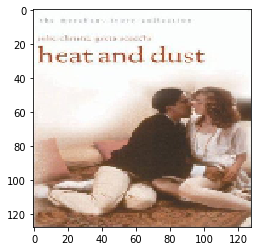

In [47]:

img=image.load_img('tt0084058.jpg',target_size=(image_width, image_heaight,3))
plt.imshow(img)
img=image.img_to_array(img)
img=img/255.0
classes=movie_data.columns[2:]
print(classes)
img=img.reshape(1,128,128,3)
pred=model.predict(img)
print(pred)
top3=np.argsort(pred[0])
maxpred=np.argmax(pred[0])
print(maxpred)
for i in range(3):
    print(classes[top3[i]])


